In [1]:
import numpy as np
import scipy as sp

import numpy.linalg as la
import scipy.linalg as sla
import scipy.sparse.linalg as ssla

from matplotlib import pyplot as plt

from JJAEigValsRoutine import *

# Single cavity - Constant boundary conditions

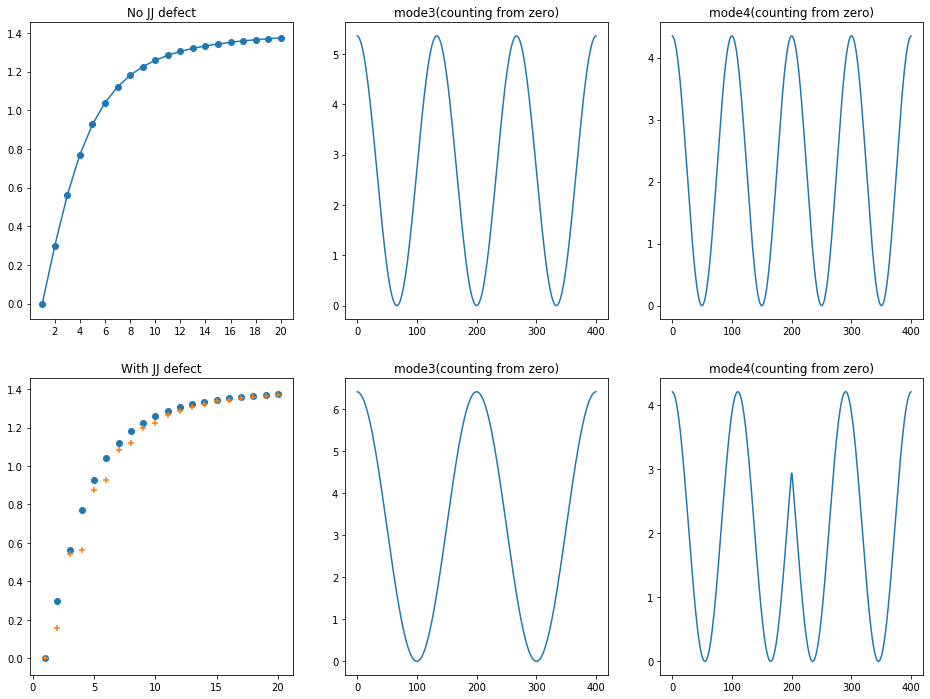

In [2]:
# System parameters
# Grid size (number of LC units in JJA resonator) 
Nx = 400 # Like L
# Circuit parameters
Ljja, Cjja, Cjjagnd = 0.66E-9, 144E-15, 1.89E-16
Ljjdefect, Cjjdefect = Ljja, Cjja
#Ljjdefect, Cjjdefect =  285.0E-9, 3.0E-15
# Number of eigenvalues to compute
nEig = 20
kRefVec = np.ones( (nEig,) )
# Compute reference eigenvalues (closed cavity case, Neumann boundary conditions)
refVals, refVecs, C1D, L1D = JJAEigs(Nx, Cjjagnd, Ljja, Cjja, Ljjdefect, Cjjdefect, nEig, bc="neu", disp="on")

# Plot frequencies
noJJeigs = np.real(refVals)
fig, axs = plt.subplots(2, 3, figsize=(16,12))
axs[0, 0].scatter(np.arange(1,nEig+1,1),np.real(refVals))
axs[0, 0].plot(np.arange(1,nEig+1,1),np.real(refVals))
axs[0, 0].set_title('No JJ defect')

x = np.linspace(0,Nx,Nx)
mN = 3
axs[0, 1].plot(x, np.abs(refVecs[:,mN])**2)
axs[0, 1].set_title('mode' + str(mN) + '(counting from zero)')
# Constructing even/odd combinations of left and right JJA modes
#oddMode = 0.5*np.add( refVecs[0:500,mN],-np.flipud(refVecs[500:,mN]) )
#evenMode = 0.5*np.add( refVecs[0:500,mN],np.flipud(refVecs[500:,mN]) )
#xhalf = np.linspace(0,Nx/2,Nx/2)
#axs[0, 1].plot(xhalf, np.abs(oddMode**2))
#axs[0, 1].plot(xhalf, np.abs(evenMode)**2)


mN = 4
axs[0, 2].plot(x, np.abs(refVecs[:,mN])**2)
axs[0, 2].set_title('mode' + str(mN) + '(counting from zero)')

#Ljja, Cjja, Cjjagnd = 0.66E-9, 144E-15, 1.89E-16
Ljjdefect, Cjjdefect =  285.0E-9, 3.0E-15

kRefVec = np.ones( (nEig,) )
# Compute reference eigenvalues (closed cavity case, Neumann boundary conditions)
refVals, refVecs, C1D, L1D = JJAEigs(Nx, Cjjagnd, Ljja, Cjja, Ljjdefect, Cjjdefect, nEig, bc="neu", disp="on")
withJJeigs = np.real(refVals)
axs[1, 0].scatter(np.arange(1,nEig+1,1),noJJeigs, marker='o')
axs[1, 0].scatter(np.arange(1,nEig+1,1),withJJeigs, marker='+')
#xs[1, 0].plot(np.arange(1,nEig+1,1),np.real(refVals))
axs[1, 0].set_title('With JJ defect')
axs[0, 0].set_xticks(np.arange(2,nEig+1,2))
# Plot two eigenvectors corresponding to even and odd modes respectively
x = np.linspace(0,Nx,Nx)
mN = 3
axs[1, 1].plot(x, np.abs(refVecs[:,mN])**2)
axs[1, 1].set_title('mode' + str(mN) + '(counting from zero)')
mN = 4
axs[1, 2].plot(x, np.abs(refVecs[:,mN])**2)
axs[1, 2].set_title('mode' + str(mN) + '(counting from zero)')

plt.show()

# The following plots the images of the inductance and capacitance matrices
#fig, ax = plt.subplots(1, 1, figsize=(8,8))
#C1Dr = np.real(C1D)
#plt.imshow(C1Dr.toarray(), interpolation='nearest')
#plt.show()
#fig, ax = plt.subplots(1, 1, figsize=(8,8))
#L1Dr = np.real(L1D)
#plt.imshow(L1Dr.toarray(), interpolation='nearest')
#plt.show()

# Single cavity - Iterative eigenvalue problem for outgoing boundary conditions

In [3]:
errTol = 1e-5
itNum = 20
# Circuit parameters
Ljja, Cjja, Cjjagnd = 0.66E-9, 144E-15, 1.89E-16
#Ljjdefect, Cjjdefect = Ljja, Cjja
#Ljjdefect, Cjjdefect =  285.0E-9, 3.0E-15
Ljjdefect, Cjjdefect = 200.0E-9, 2.0E-15
Lleft, Cleft, Cin = 2.0E-9, 1.0E-12, 400.0*Cjja
#Lleft, Cleft, Cin = 273.0E-9, 93.5E-12, 100.0*Cjja
Lright, Cright, Cout = Lleft, Cleft, Cin
# Number of eigenvalues to compute
nEig = 20
# Use the JJA with defect eigenvalues as initial guess for the iteration
kRef = np.real(refVals) # Note that these are scaled Omega squared values!

nCom = len(kRef)

# Solve eigenvalue problem
kVals, spEigVecs, errVals = JJAResOpenEigs(Nx, Lleft, Cleft, Cin, Cjjagnd, Ljja, Cjja, Ljjdefect, Cjjdefect, Lright, Cright, Cout, kRef, errTol=1e-5, itNum=20, disp="on")

Mode: 2, errre: -1.9780, errim: -1.5670, it. num.: 0
EigVal (0.5547244077467001-0.024430260630507353j)
Mode: 2, errre: -2.7372, errim: -1.3531, it. num.: 1
EigVal (0.5577916664743671-0.0397591906253525j)
Mode: 2, errre: -2.1370, errim: -1.3248, it. num.: 2
EigVal (0.5658403828062367-0.04183306931526105j)
Mode: 2, errre: -1.6749, errim: -0.9765, it. num.: 3
EigVal (0.555048427790391-0.09509669896739484j)
Mode: 2, errre: -1.6701, errim: -1.2508, it. num.: 4
EigVal (0.5760451935741079-0.04871779027130674j)
Mode: 2, errre: -1.6842, errim: -1.4468, it. num.: 5
EigVal (0.594494030503082-0.03006468040167819j)
Mode: 2, errre: -1.7262, errim: -2.2768, it. num.: 6
EigVal (0.6101027716715247+0.0043330289762986505j)
Mode: 2, errre: -1.8709, errim: -1.1693, it. num.: 7
EigVal (0.6234084050031807-0.05431741443165105j)
Mode: 2, errre: -1.9330, errim: -0.9770, it. num.: 8
EigVal (0.6380709371084368-0.08262999679134625j)
Mode: 2, errre: -0.7554, errim: -3.1599, it. num.: 9
EigVal (0.7633897541776686-0.

Mode: 6, errre: -5.2563, errim: -4.2115, it. num.: 1
EigVal (1.041284691740599-2.950738599558753e-05j)
Mode: 6, errre: -8.9024, errim: -4.2115, it. num.: 2
EigVal (1.0412846915575604-2.9507182105408742e-05j)
Mode: 6, errre: -9.0602, errim: -4.2115, it. num.: 3
EigVal (1.0412846915575715-2.950718211942994e-05j)
Mode: 6, errre: -9.0602, errim: -4.2115, it. num.: 4
EigVal (1.0412846915575813-2.950718211942775e-05j)
Mode: 6, errre: -9.0601, errim: -4.2115, it. num.: 5
EigVal (1.0412846915575693-2.9507182119428076e-05j)
Mode: 6, errre: -9.0602, errim: -4.2115, it. num.: 6
EigVal (1.0412846915575797-2.9507182119428557e-05j)
Mode: 6, errre: -9.0602, errim: -4.2115, it. num.: 7
EigVal (1.0412846915575915-2.9507182119425586e-05j)
Mode: 6, errre: -9.0602, errim: -4.2115, it. num.: 8
EigVal (1.0412846915576004-2.9507182119422903e-05j)
Mode: 6, errre: -9.0601, errim: -4.2115, it. num.: 9
EigVal (1.0412846915576037-2.950718211942167e-05j)
Mode: 6, errre: -9.0601, errim: -4.2115, it. num.: 10
EigVal

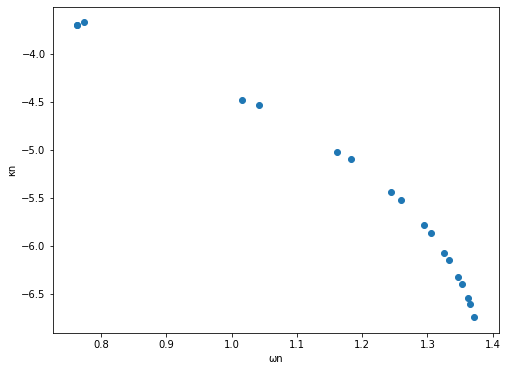

In [84]:
# Plot real and imaginary parts
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(np.real(kVals[2:]), np.log10(-np.imag(kVals[2:])) )
# ax.set_xticks(np.arange(2,nCom+1,2))
#ax.set_ylim([-0.000001, -1.1*np.min(np.imag(kVals))])
ax.set_ylabel('κn')
ax.set_xlabel('ωn')
plt.show()

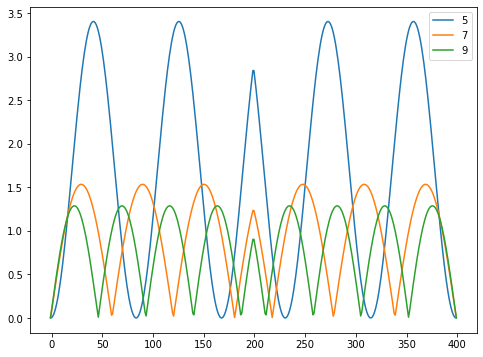

In [12]:
# Plot eigenvectors
x = np.linspace(-1,Nx-1,Nx)
mN = 5 # Mode number to plot
fig, ax = plt.subplots(1, 1, figsize=(8,6))
#ax.plot(x, np.abs(spEigVecs[:,mN])**2)
#ax.set_title('Eigenvalue: ' + str(kVals[mN]))
# Plot a few successive modes together
ax.plot(x, np.abs(spEigVecs[:,5])**2, x, np.abs(spEigVecs[:,7]), x, np.abs(spEigVecs[:,9]) )
ax.legend('579')
plt.show()

## Iterative solver

In [ ]:
# System parameters
# Grid size (number of LC units in JJA resonator) 
Nx = 1000 # Like L
# Nx = 1500 # Like L
# Circuit parameters
L, C, Cg = 1.0, 1*100.0, 1.0
# Number of eigenvalues to compute
nEig = 30
# Waveguide parameters
l, c = 1.0, 1.0
# Outcoupling parameters
CL, CR = 1.0, 1.0
# CL, CR = 10.0, 10.0
# CL, CR = 100.0, 100.0

eigVals, eigVecs = JJAResOpenIterEigs(Nx, L, C, Cg, l, c, CL, CR, nEig=nEig, errTol=1e-5, itNum=5, capItNum=10, disp="on")

In [ ]:
# Plot real and imaginary parts
fig, axs = plt.subplots(1, 2, figsize=(16,6))
ax = axs[0]
ax.scatter(np.real(eigVals)*Nx/np.pi, -np.imag(eigVals)*Nx/np.pi )
# ax.set_xticks(np.arange(2,nCom+1,2))
ax.set_ylim([-0.000001*Nx/np.pi, -1.1*np.min(np.imag(eigVals))*Nx/np.pi])
ax.set_xlabel('ωn/π')
ax.set_ylabel('κn/π')

ax = axs[1]
ax.scatter(np.arange(1,nEig,1), np.real(eigVals)*Nx/np.pi )
ax.plot(np.arange(1,nEig,1), np.real(eigVals)*Nx/np.pi )
ax.set_xlabel('n')
ax.set_ylabel('ωn/π')
plt.show()

# Coupled JJA resonators

In [ ]:
# System parameters
# Grid size (number of LC units in JJA resonator) 
Nx = 1000 # Like L
# Circuit parameters
L, C, Cg = 1.0, 1*100.0, 1.0
# Junction parameters
LJ, Csh = 1.0, 1*90.0
# Number of eigenvalues to compute
nEig = 30

# Compute reference eigenvalues (closed cavity case, Neumann boundary conditions)
refVals, refVecs = JJACoupledResClosedEigs(Nx, L, C, Cg, LJ, Csh, nEig=nEig, bc="neu")

In [ ]:
# Plot frequencies
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(np.arange(1,nEig+1,1), np.real(refVals) )
ax.plot(np.arange(1,nEig+1,1), np.real(refVals) )
ax.set_xticks(np.arange(2,nEig+1,2))
plt.show()

# Plot eigenvectors
x = np.linspace(0,Nx,Nx)
mN = 5 # Mode number to plot
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(x, np.abs(refVecs[:,mN])**2 )
plt.show()

# Testing, C = 0 case

In [ ]:
# System parameters
# Grid size (number of LC units in JJA resonator) 
Nx = 1000 # Like L
# Circuit parameters
L, C, Cg = 1.0, 0*100.0, 1.0
# Number of eigenvalues to compute
nEig = 30

# Compute reference eigenvalues (closed cavity case, Neumann boundary conditions)
refVals, refVecs = JJAResClosedEigs(Nx, L, C, Cg, nEig=nEig, bc="neu")

# Plot eigenvectors
x = np.linspace(0,Nx,Nx)
mN = 2 # Mode number to plot
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(x, np.abs(refVecs[:,mN])**2 )
plt.show()

In [ ]:
# System parameters
# Waveguide parameters
l, c = 1.0, 1.0
# Outcoupling parameters
CL, CR = 1.0, 1.0
# Reference eigenvalue
# kRef = [0.04]
# kRef = np.real((refVals[1:10]))
kRef = np.real(refVals[1:-1])
nCom = len(kRef)

# Solve eigenvalue problem
kVals, spEigVecs, errVals = JJAResOpenEigs(Nx, L, C, Cg, l, c, CL, CR, kRef, errTol=1e-5, itNum=5, disp="off")

# Quality factor
QVec = np.imag(kVals)/np.real(kVals)

In [ ]:
# Plot real and imaginary parts
fig, axs = plt.subplots(1, 2, figsize=(16,6))
ax = axs[0]
ax.scatter(np.real(kVals)*Nx/np.pi, -np.imag(kVals)*Nx/np.pi )
# ax.set_xticks(np.arange(2,nCom+1,2))
ax.set_ylim([-0.000001*Nx/np.pi, -1.1*np.min(np.imag(kVals))*Nx/np.pi])
ax.set_xlabel('ωn/π')
ax.set_ylabel('κn/π')

ax = axs[1]
ax.scatter(np.arange(1,nCom+1,1), np.real(kVals)*Nx/np.pi )
ax.plot(np.arange(1,nCom+1,1), np.real(kVals)*Nx/np.pi )
ax.set_xlabel('n')
ax.set_ylabel('ωn/π')
plt.show()

In [ ]:
# System parameters
# Grid size (number of LC units in JJA resonator) 
Nx = 1000 # Like L
# Circuit parameters
L, C, Cg = 1, 0*100.0, 1.0
# Number of eigenvalues to compute
nEig = 30
# Waveguide parameters
l, c = 1.0, 1.0
# Outcoupling parameters
# CL, CR = 1.0, 1.0
CL, CR = 10.0, 10.0
# CL, CR = 100.0, 100.0

eigVals, eigVecs = JJAResOpenIterEigs(Nx, L, C, Cg, l, c, CL, CR, nEig=nEig, errTol=1e-5, itNum=5, capItNum=10, disp="off")

In [ ]:
# Plot real and imaginary parts
fig, axs = plt.subplots(1, 2, figsize=(16,6))
ax = axs[0]
ax.scatter(np.real(eigVals)*Nx/np.pi, -np.imag(eigVals)*Nx/np.pi )
# ax.set_xticks(np.arange(2,nCom+1,2))
ax.set_ylim([-0.000001*Nx/np.pi, -1.1*np.min(np.imag(eigVals))*Nx/np.pi])
ax.set_xlabel('ωn/π')
ax.set_ylabel('κn/π')

ax = axs[1]
ax.scatter(np.arange(1,nEig,1), np.real(eigVals)*Nx/np.pi )
ax.plot(np.arange(1,nEig,1), np.real(eigVals)*Nx/np.pi )
ax.set_xlabel('n')
ax.set_ylabel('ωn/π')
plt.show()

In [ ]:
# Plot eigenvectors
x = np.linspace(0,Nx,Nx)
mN = 5 # Mode number to plot
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(x, np.abs(eigVecs[:,mN])**2 )
plt.show()

## Mode amplitudes at JJ positions

In [ ]:
# Vector to store amplitudes
ampVec = np.zeros( (nEig-1,), dtype=complex)
# Position at which to calculate amplitude
# pos = 500
pos = 125
# pos = 1
for n in range(1,nEig):
    ampVec[n-1] = np.abs(refVecs[pos,n])
    
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(np.arange(1,nEig,1), ampVec)
ax.plot(np.arange(1,nEig,1), ampVec)
plt.show()